
lat:
 <unnamed Monatomic lattice, vectors [1.0 0.0], [0.0 1.0], origin [0.0 0.0], with 1 orbitals>

syst:

hamiltonian_1（定义）:
 []


/Users/richard/miniforge3/envs/xxy/lib/python3.14/site-packages/kwant/_plotter.py:77: RuntimeWarning: plotly is not available, if other engines are unavailable, only iterator-providing functions will work
  warnings.warn("plotly is not available, if other engines are unavailable,"


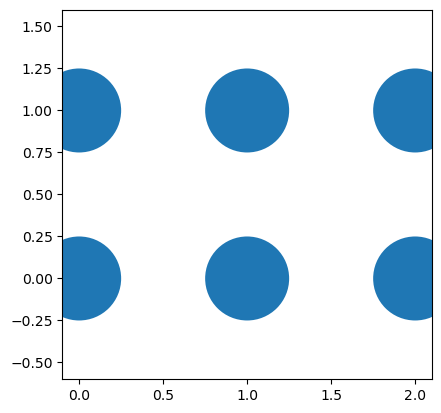


hamiltonian_2（初始化）:
 [[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


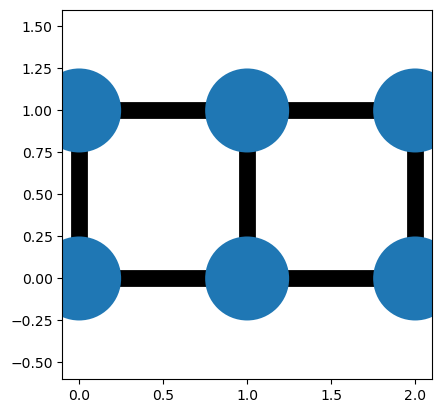


hamiltonian_3（最近邻赋值）:
 [[0.+0.j 1.-0.j 1.-0.j 0.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 1.-0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 1.-0.j 1.-0.j 0.+0.j]
 [0.+0.j 1.+0.j 1.+0.j 0.+0.j 0.+0.j 1.-0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 1.-0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 1.+0.j 0.+0.j]]


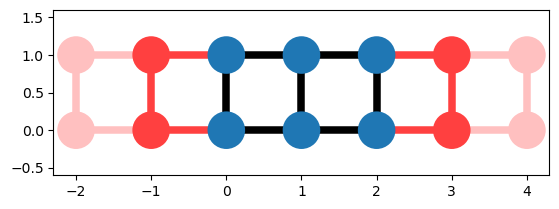


hamiltonian_4（加了电极后）:
 [[0.+0.j 1.-0.j 1.-0.j 0.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 1.-0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 1.-0.j 1.-0.j 0.+0.j]
 [0.+0.j 1.+0.j 1.+0.j 0.+0.j 0.+0.j 1.-0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 1.-0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 1.+0.j 0.+0.j]]


In [1]:
import kwant
import matplotlib.pyplot as plt


def main():
    L = 3
    W = 2

    lat = kwant.lattice.square(a=1, norbs=1)    # 定义lattice
    print('\nlat:\n', lat)

    syst = kwant.Builder()    # 定义中心区的Builder
    print('\nsyst:\n', syst)
    
    syst_finalized = syst.finalized() 
    hamiltonian = syst_finalized.hamiltonian_submatrix()   # 查看哈密顿量
    print('\nhamiltonian_1（定义）:\n', hamiltonian) 
    
    syst[(lat(x, y) for x in range(L) for y in range(W))] = 0    # 晶格初始化为0

    kwant.plot(syst)  # 画出syst的示意图

    syst_finalized = syst.finalized() 
    hamiltonian = syst_finalized.hamiltonian_submatrix()  # 查看哈密顿量
    print('\nhamiltonian_2（初始化）:\n', hamiltonian)  

    syst[lat.neighbors()] = 1    # 添加最近邻跃迁

    kwant.plot(syst)   # 画出syst的示意图

    syst_finalized = syst.finalized() 
    hamiltonian = syst_finalized.hamiltonian_submatrix()  # 查看哈密顿量
    print('\nhamiltonian_3（最近邻赋值）:\n', hamiltonian)      
    
    lead = kwant.Builder(kwant.TranslationalSymmetry((-1, 0)))  # 定义电极的Builder
    lead[(lat(0, j) for j in range(W))] = 0  # 电极晶格初始化
    lead[lat.neighbors()] = 1 # 添加最近邻跃迁
    syst.attach_lead(lead)  # 中心区加上左电极
    syst.attach_lead(lead.reversed())   # 用reversed()方法得到右电极

    # 画出syst的示意图
    kwant.plot(syst)

    # 查看哈密顿量（加了电极后，并不影响syst哈密顿量）
    syst_finalized = syst.finalized() 
    hamiltonian = syst_finalized.hamiltonian_submatrix() 
    print('\nhamiltonian_4（加了电极后）:\n', hamiltonian)


if __name__ == '__main__':
    main()